# Julia code for Lecture 31

## Perspective rendering.

Start with a matrix $P$.  Each column is a point is $R^3$.  Each point is on an edge of the box (rectangular prism) with corners $(1,1,5), (4,1,5), (1,2,5), (4,2,5), (1,1,7), (4, 1, 7), (1,2,7), (4,2,7)$.

In [1]:
P = [1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 ; 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 ; 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7]

3×24 Array{Int64,2}:
 1  2  3  4  1  2  3  4  1  2  3  4  1  2  3  4  1  2  3  4  1  2  3  4
 1  1  1  1  2  2  2  2  1  1  1  1  2  2  2  2  1  1  1  1  2  2  2  2
 5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7

$n$ is the number of points we are plotting (number of columns in $P$.)

In [2]:
n = size(P,2)

24

We create a basis and matrix $A$ for camera coordinates. (Camera center is one unit behind upper left corner of image plane ($a_3 = (0,0,1)$), each pixel is 1/100 units on each side: $a_1 = (.01,0,0)$, $a_2 = (0,.01,0)$

In [3]:
a1 = [.01 ; 0 ; 0]

3-element Array{Float64,1}:
 0.01
 0.0 
 0.0 

In [4]:
a2 = [0 ; .01 ; 0]

3-element Array{Float64,1}:
 0.0 
 0.01
 0.0 

In [5]:
a3 = [0 ; 0 ; 1]

3-element Array{Int64,1}:
 0
 0
 1

In [6]:
A = [a1 a2 a3]

3×3 Array{Float64,2}:
 0.01  0.0   0.0
 0.0   0.01  0.0
 0.0   0.0   1.0

In [7]:
inv(A)

3×3 Array{Float64,2}:
 100.0    0.0  0.0
   0.0  100.0  0.0
   0.0    0.0  1.0

the Matrix $CamP = A^{-1}P$ contains the points in camera coordinates

In [8]:
CamP = inv(A) * P

3×24 Array{Float64,2}:
 100.0  200.0  300.0  400.0  100.0  …  400.0  100.0  200.0  300.0  400.0
 100.0  100.0  100.0  100.0  200.0     100.0  200.0  200.0  200.0  200.0
   5.0    5.0    5.0    5.0    5.0       7.0    7.0    7.0    7.0    7.0

Project each point in $CamP = A^{-1}P$ to image plane by scaling by the third coordinate.

In [9]:
Q = [CamP[i,j]/CamP[3,j] for i = 1:2, j = 1:n]  

2×24 Array{Float64,2}:
 20.0  40.0  60.0  80.0  20.0  40.0  …  14.2857  28.5714  42.8571  57.1429
 20.0  20.0  20.0  20.0  40.0  40.0     28.5714  28.5714  28.5714  28.5714

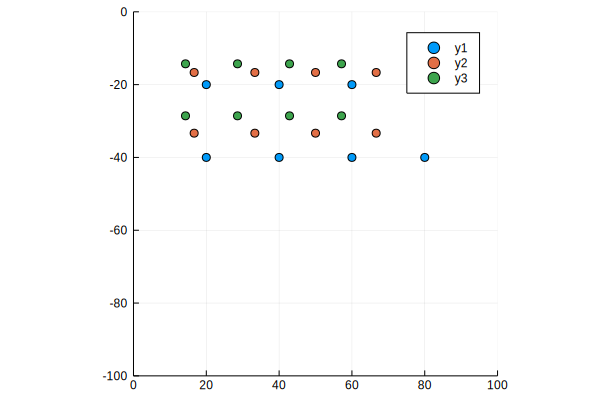

In [10]:
using Plots

scatter(Q[1,1:8], -Q[2,1:8], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,9:16], -Q[2,9:16], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,17:24], -Q[2,17:24], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)

## Move the box down

Let's look at the same box moved down a couple units (create the matrix $Pdown$ by adding 2 to the second coordinate of the matrix $P$--remember that the $y$ axis is oriented downward!).

In [11]:
Pdown = [P[1,:]' ; (P[2,:].+2)' ; P[3,:]']

3×24 Array{Int64,2}:
 1  2  3  4  1  2  3  4  1  2  3  4  1  2  3  4  1  2  3  4  1  2  3  4
 3  3  3  3  4  4  4  4  3  3  3  3  4  4  4  4  3  3  3  3  4  4  4  4
 5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7

In [12]:
CamPdown = inv(A) * Pdown

3×24 Array{Float64,2}:
 100.0  200.0  300.0  400.0  100.0  …  400.0  100.0  200.0  300.0  400.0
 300.0  300.0  300.0  300.0  400.0     300.0  400.0  400.0  400.0  400.0
   5.0    5.0    5.0    5.0    5.0       7.0    7.0    7.0    7.0    7.0

In [13]:
Q = [CamPdown[i,j]/CamPdown[3,j] for i = 1:2, j = 1:n]  

2×24 Array{Float64,2}:
 20.0  40.0  60.0  80.0  20.0  40.0  …  14.2857  28.5714  42.8571  57.1429
 60.0  60.0  60.0  60.0  80.0  80.0     57.1429  57.1429  57.1429  57.1429

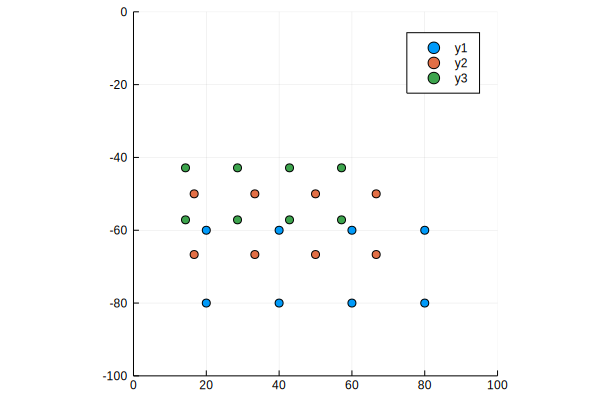

In [14]:
using Plots

scatter(Q[1,1:8], -Q[2,1:8], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,9:16], -Q[2,9:16], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,17:24], -Q[2,17:24], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)

## Move the box away

Let's look at the same box moved away a couple units (create the matrix $Paway$ by adding 3 to the third coordinate of the matrix $P$--remember that the $z$ axis is oriented away!).

In [15]:
Paway = [P[1,:]' ; P[2,:]' ; (P[3,:].+3)']

3×24 Array{Int64,2}:
 1  2  3  4  1  2  3  4  1  2  3  4  1  …  4   1   2   3   4   1   2   3   4
 1  1  1  1  2  2  2  2  1  1  1  1  2     2   1   1   1   1   2   2   2   2
 8  8  8  8  8  8  8  8  9  9  9  9  9     9  10  10  10  10  10  10  10  10

In [16]:
CamPaway = inv(A) * Paway

3×24 Array{Float64,2}:
 100.0  200.0  300.0  400.0  100.0  …  400.0  100.0  200.0  300.0  400.0
 100.0  100.0  100.0  100.0  200.0     100.0  200.0  200.0  200.0  200.0
   8.0    8.0    8.0    8.0    8.0      10.0   10.0   10.0   10.0   10.0

In [17]:
Q = [CamPaway[i,j]/CamPaway[3,j] for i = 1:2, j = 1:n]  

2×24 Array{Float64,2}:
 12.5  25.0  37.5  50.0  12.5  25.0  …  30.0  40.0  10.0  20.0  30.0  40.0
 12.5  12.5  12.5  12.5  25.0  25.0     10.0  10.0  20.0  20.0  20.0  20.0

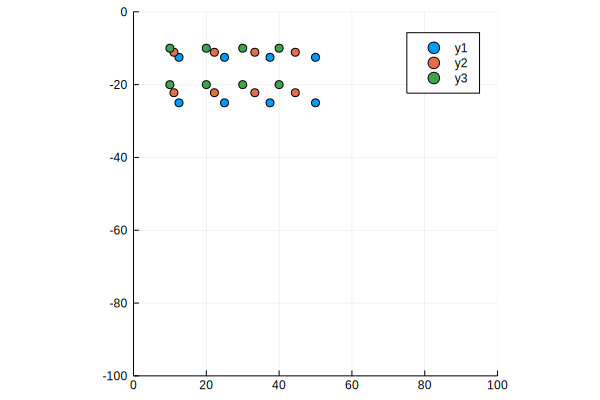

In [18]:
using Plots

scatter(Q[1,1:8], -Q[2,1:8], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,9:16], -Q[2,9:16], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,17:24], -Q[2,17:24], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)

## Move the box down and away

Add to the second and third coordinates to move the box down and away (matrix $Pda$)

In [19]:
Pda = [P[1,:]' ; (P[2,:].+2)' ; (P[3,:].+3)']

3×24 Array{Int64,2}:
 1  2  3  4  1  2  3  4  1  2  3  4  1  …  4   1   2   3   4   1   2   3   4
 3  3  3  3  4  4  4  4  3  3  3  3  4     4   3   3   3   3   4   4   4   4
 8  8  8  8  8  8  8  8  9  9  9  9  9     9  10  10  10  10  10  10  10  10

In [20]:
CamPda = inv(A) * Pda

3×24 Array{Float64,2}:
 100.0  200.0  300.0  400.0  100.0  …  400.0  100.0  200.0  300.0  400.0
 300.0  300.0  300.0  300.0  400.0     300.0  400.0  400.0  400.0  400.0
   8.0    8.0    8.0    8.0    8.0      10.0   10.0   10.0   10.0   10.0

In [21]:
Q = [CamPda[i,j]/CamPda[3,j] for i = 1:2, j = 1:n]  

2×24 Array{Float64,2}:
 12.5  25.0  37.5  50.0  12.5  25.0  …  30.0  40.0  10.0  20.0  30.0  40.0
 37.5  37.5  37.5  37.5  50.0  50.0     30.0  30.0  40.0  40.0  40.0  40.0

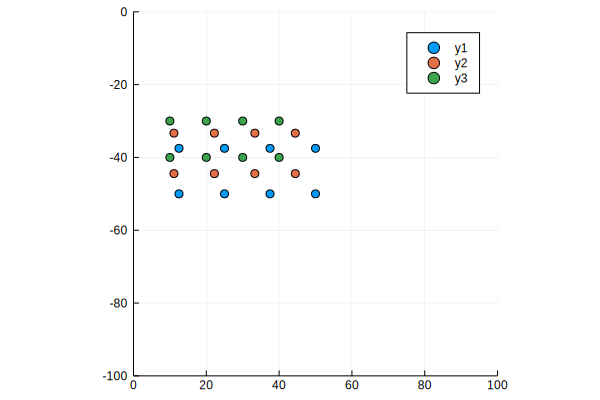

In [22]:
using Plots

scatter(Q[1,1:8], -Q[2,1:8], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,9:16], -Q[2,9:16], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,17:24], -Q[2,17:24], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)

## Move the box down, away, and to the right

Create the matrix $Pfar$ by adding 2 to the second coordinate, 3 to the third coordinate, and 3 to the first coordinate of the matrix $P$).

In [23]:
Pfar = [(P[1,:].+3)' ; (P[2,:].+2)' ; (P[3,:].+3)']

3×24 Array{Int64,2}:
 4  5  6  7  4  5  6  7  4  5  6  7  4  …  7   4   5   6   7   4   5   6   7
 3  3  3  3  4  4  4  4  3  3  3  3  4     4   3   3   3   3   4   4   4   4
 8  8  8  8  8  8  8  8  9  9  9  9  9     9  10  10  10  10  10  10  10  10

In [24]:
CamPfar = inv(A) * Pfar

3×24 Array{Float64,2}:
 400.0  500.0  600.0  700.0  400.0  …  700.0  400.0  500.0  600.0  700.0
 300.0  300.0  300.0  300.0  400.0     300.0  400.0  400.0  400.0  400.0
   8.0    8.0    8.0    8.0    8.0      10.0   10.0   10.0   10.0   10.0

In [25]:
Q = [CamPfar[i,j]/CamPfar[3,j] for i = 1:2, j = 1:n]  

2×24 Array{Float64,2}:
 50.0  62.5  75.0  87.5  50.0  62.5  …  60.0  70.0  40.0  50.0  60.0  70.0
 37.5  37.5  37.5  37.5  50.0  50.0     30.0  30.0  40.0  40.0  40.0  40.0

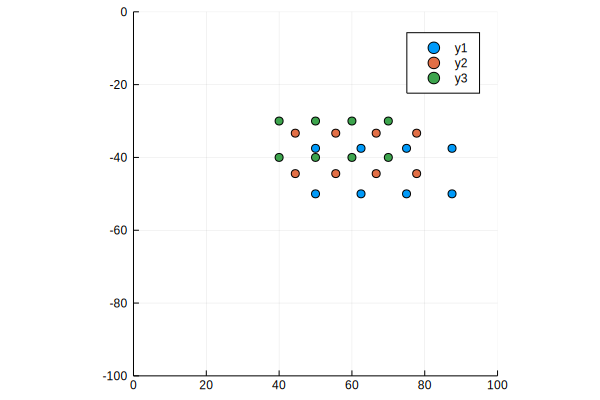

In [26]:
using Plots

scatter(Q[1,1:8], -Q[2,1:8], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,9:16], -Q[2,9:16], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)
scatter!(Q[1,17:24], -Q[2,17:24], xlims=(0, 100), ylims=(-100,0),aspect_ratio=:equal)